In [0]:
from matplotlib import image
from matplotlib import pyplot
from PIL import Image
from resizeimage import resizeimage
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import Conv1D,Conv2D, MaxPooling2D, Dense, Flatten, GlobalMaxPool2D, Dropout,BatchNormalization
from keras.losses import categorical_crossentropy,sparse_categorical_crossentropy,binary_crossentropy
from keras.models import Sequential
from keras.optimizers import Adam
from keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix


Using TensorFlow backend.


In [0]:
X = np.load('C:/Users/dhamuk/3D Objects/x_train.npy')
Y = np.load('C:/Users/dhamuk/3D Objects/y_train.npy')
print('X.shape = {}'.format(X.shape))
print('Y.shape = {}'.format(Y.shape))

X_test = np.load('C:/Users/dhamuk/3D Objects/x_test.npy')
Y_test = np.load('C:/Users/dhamuk/3D Objects/y_test.npy')
print(Y_test.shape)
print(X_test.shape)

X.shape = (2637, 3072)
Y.shape = (2637,)
(660,)
(660, 3072)


In [0]:
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.15, random_state=1)

In [0]:
X_train_rs, X_valid_rs = np.reshape(X_train, (-1,32, 32, 3)),  np.reshape(X_valid, (-1, 32, 32, 3))
X_train_rs.shape

X_test  = np.reshape(X_test, (-1,32, 32, 3))
X_test.shape


(660, 32, 32, 3)

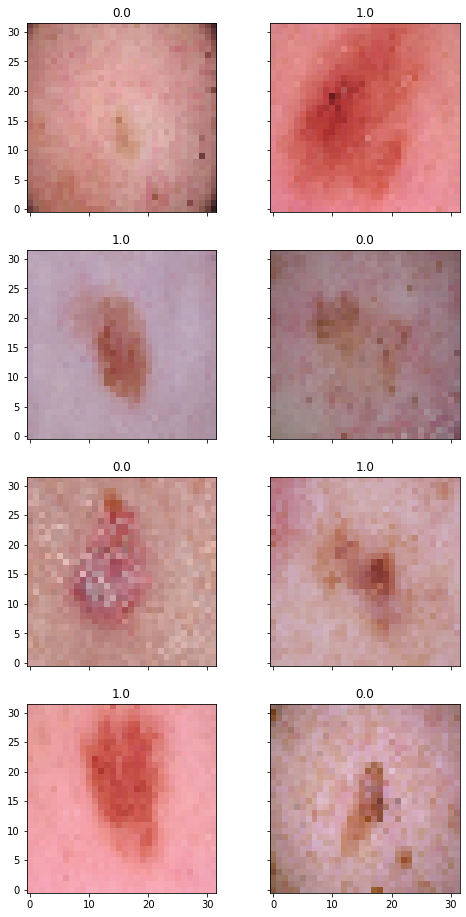

In [0]:
# plot an example of each class
fig, ax = plt.subplots(4,2, figsize=(8,16), sharex=True, sharey=True)
for i, j in enumerate([6, 1, 3, 28, 23, 4, 5, 0]):
    r = i // 2
    c = i % 2
    ax[r,c].imshow(X_train_rs[j], origin='lower')
    ax[r,c].title.set_text(str(y_train[j]))

In [0]:
def plothistory(h, metric='accuracy'):
    
    
    if metric == 'acc':
        plt.title('accuracy')
    else:
        plt.title(metric)
        
    plt.plot(h.history['val_'+metric], label='validation')
    plt.plot(h.history[metric], label='train')
    plt.legend(loc='lower right')
    plt.xlabel('epoch')


In [0]:
# STUDENT

def get_cnn(input_shape=(32,32,3), n_classes=1):
        
    model = keras.Sequential()   
    model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape,padding='same'))    
          
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    model.add(Dropout(rate=0.4))
    
    model.add(Conv2D(64, kernel_size=(2, 2),activation='relu' ))          
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    model.add(Dropout(rate=0.4))
   
    model.add(Conv2D(128, kernel_size=(2, 2),activation='relu',padding ='valid'))    
    model.add(MaxPooling2D(pool_size=(2, 2),padding='valid' ))
    model.add(Dropout(rate=0.5))
    
    model.add(Conv2D(128, kernel_size=(2, 2), activation='relu',padding ='valid'))   
    model.add(Dropout(rate=0.5))    
  
    #model.add(Conv2D(128, kernel_size=(2, 2), activation='relu',padding ='valid'))   
    #model.add(Dropout(rate=0.4)) 
   
    model.add(Flatten())
    #model.add(Dense(16, activation='sigmoid'))
    
    #model.add(Dense(8, activation='relu'))
    
    model.add(Dense(n_classes, activation='sigmoid'))
    
    
    
    return model


#summary
cnn = get_cnn()
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)        

In [0]:
cnn.compile(optimizer=Adam(lr=0.001), loss=binary_crossentropy, metrics=['accuracy'])
history = cnn.fit(X_train_rs, y_train, epochs=300, batch_size=128, validation_data=(X_valid_rs, y_valid), shuffle=True)

Train on 2241 samples, validate on 396 samples
Epoch 1/300
2241/2241 [==============================] - 1s 632us/step - loss: 21.0082 - accuracy: 0.5136 - val_loss: 0.6023 - val_accuracy: 0.6641
Epoch 2/300
2241/2241 [==============================] - 1s 524us/step - loss: 2.4349 - accuracy: 0.5274 - val_loss: 0.6189 - val_accuracy: 0.5833
Epoch 3/300
2241/2241 [==============================] - 1s 514us/step - loss: 1.1559 - accuracy: 0.5457 - val_loss: 0.6494 - val_accuracy: 0.7424
Epoch 4/300
2241/2241 [==============================] - 1s 514us/step - loss: 0.9078 - accuracy: 0.5542 - val_loss: 0.6469 - val_accuracy: 0.7222
Epoch 5/300
2241/2241 [==============================] - 1s 516us/step - loss: 0.8152 - accuracy: 0.5631 - val_loss: 0.6554 - val_accuracy: 0.7374
Epoch 6/300
2241/2241 [==============================] - 1s 511us/step - loss: 0.7536 - accuracy: 0.5944 - val_loss: 0.6517 - val_accuracy: 0.7348
Epoch 7/300
2241/2241 [==============================] - 1s 522us/step

2241/2241 [==============================] - 1s 507us/step - loss: 0.4028 - accuracy: 0.7961 - val_loss: 0.4214 - val_accuracy: 0.7879
Epoch 57/300
2241/2241 [==============================] - 1s 578us/step - loss: 0.4108 - accuracy: 0.7961 - val_loss: 0.3969 - val_accuracy: 0.8157
Epoch 58/300
2241/2241 [==============================] - 1s 549us/step - loss: 0.4168 - accuracy: 0.7912 - val_loss: 0.3938 - val_accuracy: 0.8056
Epoch 59/300
2241/2241 [==============================] - 1s 502us/step - loss: 0.4131 - accuracy: 0.7970 - val_loss: 0.3960 - val_accuracy: 0.8005
Epoch 60/300
2241/2241 [==============================] - 1s 508us/step - loss: 0.4112 - accuracy: 0.7925 - val_loss: 0.4209 - val_accuracy: 0.7980
Epoch 61/300
2241/2241 [==============================] - 1s 508us/step - loss: 0.4162 - accuracy: 0.7965 - val_loss: 0.4299 - val_accuracy: 0.7980
Epoch 62/300
2241/2241 [==============================] - 1s 514us/step - loss: 0.4020 - accuracy: 0.7934 - val_loss: 0.4003 

2241/2241 [==============================] - 1s 537us/step - loss: 0.3865 - accuracy: 0.8032 - val_loss: 0.3761 - val_accuracy: 0.8056
Epoch 112/300
2241/2241 [==============================] - 1s 513us/step - loss: 0.3723 - accuracy: 0.8242 - val_loss: 0.4013 - val_accuracy: 0.7904
Epoch 113/300
2241/2241 [==============================] - 1s 539us/step - loss: 0.3827 - accuracy: 0.8050 - val_loss: 0.3867 - val_accuracy: 0.8030
Epoch 114/300
2241/2241 [==============================] - 1s 571us/step - loss: 0.3781 - accuracy: 0.8032 - val_loss: 0.3963 - val_accuracy: 0.8106
Epoch 115/300
2241/2241 [==============================] - 1s 582us/step - loss: 0.3764 - accuracy: 0.8072 - val_loss: 0.3999 - val_accuracy: 0.7879
Epoch 116/300
2241/2241 [==============================] - 1s 578us/step - loss: 0.3696 - accuracy: 0.8184 - val_loss: 0.3829 - val_accuracy: 0.8131
Epoch 117/300
2241/2241 [==============================] - 1s 499us/step - loss: 0.3788 - accuracy: 0.8108 - val_loss: 0

2241/2241 [==============================] - 1s 479us/step - loss: 0.3443 - accuracy: 0.8300 - val_loss: 0.3794 - val_accuracy: 0.8030
Epoch 167/300
2241/2241 [==============================] - 1s 488us/step - loss: 0.3494 - accuracy: 0.8300 - val_loss: 0.3912 - val_accuracy: 0.8359
Epoch 168/300
2241/2241 [==============================] - 1s 482us/step - loss: 0.3462 - accuracy: 0.8255 - val_loss: 0.3786 - val_accuracy: 0.8005
Epoch 169/300
2241/2241 [==============================] - 1s 481us/step - loss: 0.3461 - accuracy: 0.8300 - val_loss: 0.3865 - val_accuracy: 0.8081
Epoch 170/300
2241/2241 [==============================] - 1s 474us/step - loss: 0.3627 - accuracy: 0.8206 - val_loss: 0.3834 - val_accuracy: 0.8081
Epoch 171/300
2241/2241 [==============================] - 1s 482us/step - loss: 0.3471 - accuracy: 0.8309 - val_loss: 0.3808 - val_accuracy: 0.8106
Epoch 172/300
2241/2241 [==============================] - 1s 472us/step - loss: 0.3365 - accuracy: 0.8340 - val_loss: 0

2241/2241 [==============================] - 1s 508us/step - loss: 0.3426 - accuracy: 0.8402 - val_loss: 0.4591 - val_accuracy: 0.7778
Epoch 222/300
2241/2241 [==============================] - 1s 505us/step - loss: 0.3292 - accuracy: 0.8380 - val_loss: 0.3919 - val_accuracy: 0.8131
Epoch 223/300
2241/2241 [==============================] - 1s 500us/step - loss: 0.3333 - accuracy: 0.8327 - val_loss: 0.4264 - val_accuracy: 0.8056
Epoch 224/300
2241/2241 [==============================] - 1s 494us/step - loss: 0.3325 - accuracy: 0.8318 - val_loss: 0.4504 - val_accuracy: 0.7702
Epoch 225/300
2241/2241 [==============================] - 1s 502us/step - loss: 0.3428 - accuracy: 0.8474 - val_loss: 0.4025 - val_accuracy: 0.8005
Epoch 226/300
2241/2241 [==============================] - 1s 639us/step - loss: 0.3326 - accuracy: 0.8327 - val_loss: 0.3693 - val_accuracy: 0.8283
Epoch 227/300
2241/2241 [==============================] - 1s 498us/step - loss: 0.3200 - accuracy: 0.8371 - val_loss: 0

2241/2241 [==============================] - 1s 527us/step - loss: 0.3180 - accuracy: 0.8478 - val_loss: 0.3560 - val_accuracy: 0.8157
Epoch 277/300
2241/2241 [==============================] - 1s 530us/step - loss: 0.2976 - accuracy: 0.8626 - val_loss: 0.3987 - val_accuracy: 0.7879
Epoch 278/300
2241/2241 [==============================] - 1s 527us/step - loss: 0.3061 - accuracy: 0.8532 - val_loss: 0.3825 - val_accuracy: 0.8106
Epoch 279/300
2241/2241 [==============================] - 1s 530us/step - loss: 0.3112 - accuracy: 0.8563 - val_loss: 0.4247 - val_accuracy: 0.7904
Epoch 280/300
2241/2241 [==============================] - 1s 534us/step - loss: 0.3099 - accuracy: 0.8514 - val_loss: 0.4468 - val_accuracy: 0.7727
Epoch 281/300
2241/2241 [==============================] - 1s 531us/step - loss: 0.3058 - accuracy: 0.8514 - val_loss: 0.3658 - val_accuracy: 0.8283
Epoch 282/300
2241/2241 [==============================] - 1s 550us/step - loss: 0.3027 - accuracy: 0.8554 - val_loss: 0

CNN Performance validation: 0.8080808073282242
CNN Performance train: 0.8549754619598389


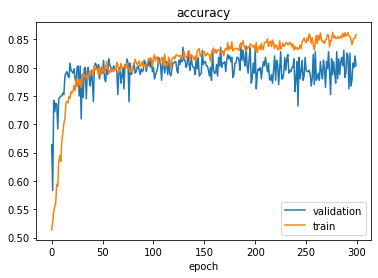

In [0]:
print('CNN Performance validation: {}'.format(np.mean(history.history['val_accuracy'][-4:])))
print('CNN Performance train: {}'.format(np.mean(history.history['accuracy'][-2:])))


plothistory(history)


In [0]:

import seaborn as sns

def plot_similarity(labels, features):
    
  #corr = np.inner(features, features)
    
  sns.set(font_scale=1.2)
  fig.set_size_inches(10, 10)
  g = sns.heatmap(
      np.ceil(features),
      xticklabels=labels,
      yticklabels=labels,
      #vmin=0,
      #vmax=1,
      cmap="YlOrRd",annot=True,fmt='g')
  g.set_xticklabels(labels )
  g.set_title("Confusion Matrix : Test set")
  plt.gcf().set_size_inches(10, 6)
  plt.show()

              precision    recall  f1-score   support

   malignant       0.70      0.96      0.81       300
      benign       0.95      0.66      0.78       360

    accuracy                           0.80       660
   macro avg       0.83      0.81      0.80       660
weighted avg       0.84      0.80      0.79       660



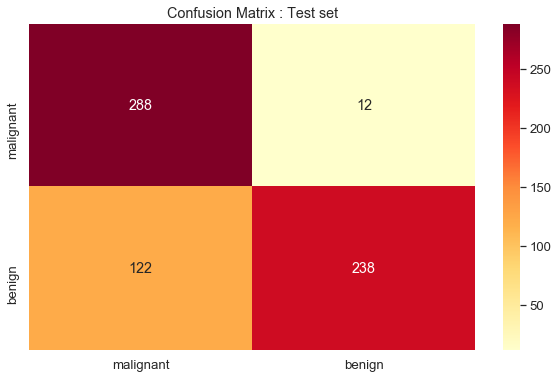

0.96
0.6611111111111111


In [0]:



y_predict=cnn.predict_classes(X_test)


target_names = ['malignant', 'benign']

print(classification_report(Y_test, y_predict,target_names=target_names))
cm=confusion_matrix(Y_test, y_predict)
  

plot_similarity(target_names, cm)

tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn+fp)
sensitivity=tp / (tp+fn)

print(specificity)
print(sensitivity)

In [0]:
X_g = np.load('C:/Users/dhamuk/3D Objects/x_train_mix.npy')
Y_g = np.load('C:/Users/dhamuk/3D Objects/y_train_mix.npy')
print('X_g.shape = {}'.format(X_g.shape))
print('Y_g.shape = {}'.format(Y_g.shape))

X_train_gan, X_valid_gan, y_train_gan, y_valid_gan = train_test_split(X_g, Y_g, test_size=0.15, random_state=1)
X_train_gan_rs, X_valid_gan_rs = np.reshape(X_train_gan, (-1,32, 32, 3)),  np.reshape(X_valid_gan, (-1, 32, 32, 3))
X_train_gan_rs.shape



X_g.shape = (2877, 3072)
Y_g.shape = (2877,)


(2445, 32, 32, 3)

In [0]:
cnn2 = get_cnn()

cnn2.compile(optimizer=Adam(lr=0.001), loss=binary_crossentropy, metrics=['accuracy'])
history2 = cnn2.fit(X_train_gan_rs, y_train_gan, epochs=300, batch_size=128, validation_data=(X_valid_gan_rs, y_valid_gan), shuffle=True)

Train on 2445 samples, validate on 432 samples
Epoch 1/300
2445/2445 [==============================] - 2s 614us/step - loss: 13.0846 - accuracy: 0.5141 - val_loss: 0.7160 - val_accuracy: 0.5093
Epoch 2/300
2445/2445 [==============================] - 1s 512us/step - loss: 1.3325 - accuracy: 0.5517 - val_loss: 0.6816 - val_accuracy: 0.5694
Epoch 3/300
2445/2445 [==============================] - 1s 519us/step - loss: 0.7462 - accuracy: 0.6180 - val_loss: 0.6652 - val_accuracy: 0.7199
Epoch 4/300
2445/2445 [==============================] - 1s 517us/step - loss: 0.6716 - accuracy: 0.6315 - val_loss: 0.6485 - val_accuracy: 0.7454
Epoch 5/300
2445/2445 [==============================] - 1s 575us/step - loss: 0.6264 - accuracy: 0.6765 - val_loss: 0.6420 - val_accuracy: 0.7523
Epoch 6/300
2445/2445 [==============================] - 2s 615us/step - loss: 0.5976 - accuracy: 0.6888 - val_loss: 0.6161 - val_accuracy: 0.7593
Epoch 7/300
2445/2445 [==============================] - 1s 574us/step

2445/2445 [==============================] - 1s 478us/step - loss: 0.4244 - accuracy: 0.7751 - val_loss: 0.4516 - val_accuracy: 0.7523
Epoch 57/300
2445/2445 [==============================] - 1s 475us/step - loss: 0.4375 - accuracy: 0.7652 - val_loss: 0.4498 - val_accuracy: 0.7500
Epoch 58/300
2445/2445 [==============================] - 1s 475us/step - loss: 0.4273 - accuracy: 0.7808 - val_loss: 0.4510 - val_accuracy: 0.7500
Epoch 59/300
2445/2445 [==============================] - 1s 474us/step - loss: 0.4328 - accuracy: 0.7734 - val_loss: 0.4487 - val_accuracy: 0.7523
Epoch 60/300
2445/2445 [==============================] - 1s 481us/step - loss: 0.4308 - accuracy: 0.7693 - val_loss: 0.4481 - val_accuracy: 0.7639
Epoch 61/300
2445/2445 [==============================] - 1s 470us/step - loss: 0.4194 - accuracy: 0.7861 - val_loss: 0.4433 - val_accuracy: 0.7755
Epoch 62/300
2445/2445 [==============================] - 1s 472us/step - loss: 0.4232 - accuracy: 0.7832 - val_loss: 0.4391 

2445/2445 [==============================] - 1s 509us/step - loss: 0.3973 - accuracy: 0.7926 - val_loss: 0.4257 - val_accuracy: 0.7778
Epoch 112/300
2445/2445 [==============================] - 1s 509us/step - loss: 0.4127 - accuracy: 0.7914 - val_loss: 0.4343 - val_accuracy: 0.7431
Epoch 113/300
2445/2445 [==============================] - 1s 507us/step - loss: 0.3965 - accuracy: 0.7918 - val_loss: 0.4240 - val_accuracy: 0.7801
Epoch 114/300
2445/2445 [==============================] - 1s 504us/step - loss: 0.3860 - accuracy: 0.8025 - val_loss: 0.4244 - val_accuracy: 0.7639
Epoch 115/300
2445/2445 [==============================] - 1s 524us/step - loss: 0.3826 - accuracy: 0.8094 - val_loss: 0.4325 - val_accuracy: 0.7593
Epoch 116/300
2445/2445 [==============================] - 1s 579us/step - loss: 0.3884 - accuracy: 0.7984 - val_loss: 0.4166 - val_accuracy: 0.7778
Epoch 117/300
2445/2445 [==============================] - 2s 660us/step - loss: 0.3964 - accuracy: 0.7890 - val_loss: 0

2445/2445 [==============================] - 1s 474us/step - loss: 0.3724 - accuracy: 0.8094 - val_loss: 0.4193 - val_accuracy: 0.7917
Epoch 167/300
2445/2445 [==============================] - 1s 478us/step - loss: 0.3777 - accuracy: 0.8053 - val_loss: 0.4208 - val_accuracy: 0.7708
Epoch 168/300
2445/2445 [==============================] - 1s 478us/step - loss: 0.3676 - accuracy: 0.8143 - val_loss: 0.4156 - val_accuracy: 0.7940
Epoch 169/300
2445/2445 [==============================] - 1s 472us/step - loss: 0.3610 - accuracy: 0.8106 - val_loss: 0.4125 - val_accuracy: 0.7963
Epoch 170/300
2445/2445 [==============================] - 1s 473us/step - loss: 0.3690 - accuracy: 0.8070 - val_loss: 0.4198 - val_accuracy: 0.7940
Epoch 171/300
2445/2445 [==============================] - 1s 522us/step - loss: 0.3666 - accuracy: 0.8049 - val_loss: 0.4142 - val_accuracy: 0.7569
Epoch 172/300
2445/2445 [==============================] - 1s 473us/step - loss: 0.3686 - accuracy: 0.8065 - val_loss: 0

Epoch 221/300
2445/2445 [==============================] - 1s 482us/step - loss: 0.3633 - accuracy: 0.8008 - val_loss: 0.4227 - val_accuracy: 0.7847
Epoch 222/300
2445/2445 [==============================] - 1s 483us/step - loss: 0.3708 - accuracy: 0.8004 - val_loss: 0.4024 - val_accuracy: 0.7986
Epoch 223/300
2445/2445 [==============================] - 1s 503us/step - loss: 0.3510 - accuracy: 0.8135 - val_loss: 0.4219 - val_accuracy: 0.7778
Epoch 224/300
2445/2445 [==============================] - 1s 473us/step - loss: 0.3671 - accuracy: 0.8110 - val_loss: 0.4128 - val_accuracy: 0.7940
Epoch 225/300
2445/2445 [==============================] - 1s 470us/step - loss: 0.3602 - accuracy: 0.8180 - val_loss: 0.4272 - val_accuracy: 0.7847
Epoch 226/300
2445/2445 [==============================] - 1s 520us/step - loss: 0.3670 - accuracy: 0.8131 - val_loss: 0.4211 - val_accuracy: 0.7593
Epoch 227/300
2445/2445 [==============================] - 1s 488us/step - loss: 0.3659 - accuracy: 0.8155

Epoch 276/300
2445/2445 [==============================] - 1s 486us/step - loss: 0.3577 - accuracy: 0.8045 - val_loss: 0.4060 - val_accuracy: 0.8056
Epoch 277/300
2445/2445 [==============================] - 1s 483us/step - loss: 0.3420 - accuracy: 0.8225 - val_loss: 0.4037 - val_accuracy: 0.8009
Epoch 278/300
2445/2445 [==============================] - 1s 478us/step - loss: 0.3444 - accuracy: 0.8204 - val_loss: 0.4096 - val_accuracy: 0.7963
Epoch 279/300
2445/2445 [==============================] - 1s 469us/step - loss: 0.3286 - accuracy: 0.8335 - val_loss: 0.4056 - val_accuracy: 0.8032
Epoch 280/300
2445/2445 [==============================] - 1s 501us/step - loss: 0.3272 - accuracy: 0.8299 - val_loss: 0.4088 - val_accuracy: 0.7801
Epoch 281/300
2445/2445 [==============================] - 1s 536us/step - loss: 0.3274 - accuracy: 0.8511 - val_loss: 0.4087 - val_accuracy: 0.8056
Epoch 282/300
2445/2445 [==============================] - 1s 496us/step - loss: 0.3358 - accuracy: 0.8307

CNN Performance validation: 0.7939814925193787
CNN Performance train: 0.8255623579025269


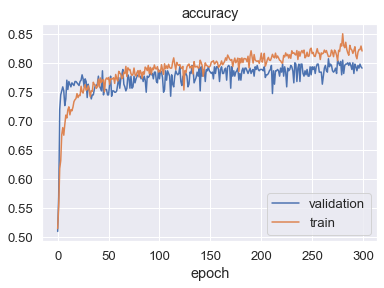

In [0]:
print('CNN Performance validation: {}'.format(np.mean(history2.history['val_accuracy'][-4:])))
print('CNN Performance train: {}'.format(np.mean(history2.history['accuracy'][-2:])))


plothistory(history2)



              precision    recall  f1-score   support

   malignant       0.74      0.94      0.83       300
      benign       0.94      0.73      0.82       360

    accuracy                           0.83       660
   macro avg       0.84      0.84      0.83       660
weighted avg       0.85      0.83      0.83       660



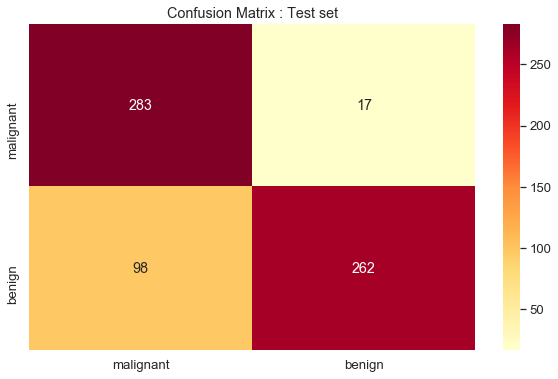

0.9433333333333334
0.7277777777777777


In [0]:
y_predict=cnn2.predict_classes(X_test)


target_names = ['malignant', 'benign']

print(classification_report(Y_test, y_predict,target_names=target_names))
cm=confusion_matrix(Y_test, y_predict)

plot_similarity(target_names, cm)

tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn+fp)
sensitivity=tp / (tp+fn)

print(specificity)
print(sensitivity)